Regression-3 (Deep Dive into regression)

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [77]:
pumpkins = pd.read_csv('pumpkin.csv')
pumpkins.head(10)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
5,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/12/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
6,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,170.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
7,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
8,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,10/1/16,160.0,170.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
9,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,10/1/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [78]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex = True)]
# Selected pumpkins that has only 'bushel' in its 'Package' column.
new_columns= ['Package','Variety','City Name', 'Month', 'Low Price', 'High Price', 'Date', 'City Num', 'Variety Num']
pumpkins = pumpkins.drop([i for i in pumpkins.columns if i not in new_columns],axis=1)
# Drops columns that are not in the new_columns.
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
# Calculates the average price and extracts month from date (American format)
new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
# Created a new dataframe to new_pumpkins from pumpkins
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2
# Locate and standardize the prices

new_pumpkins.head(10)


,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
75,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
76,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
77,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,18.5,16.136364
78,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
79,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545


We loaded the dataset the dataset we want to work with and then prepared it according to what's best for solving the problems at our hand.

In [79]:
# Transforming the data into numerics using LabelEncoder
# It encodes the target labels with value between 0 and n_classes-1
# We do this transformations beacause numerical values are much easier for the model to process
new_pumpkins.iloc[:,0:-1] = new_pumpkins.iloc[:,0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins.head(10)

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.636364
71,1,3,1,0,10,7,16.363636
72,2,3,1,0,10,7,16.363636
73,2,3,1,0,9,6,15.454545
74,2,3,1,0,5,3,13.636364
75,2,3,1,0,10,7,16.363636
76,2,3,1,0,9,6,15.454545
77,2,3,1,0,9,8,16.136364
78,2,3,1,0,5,3,13.636364
79,2,3,1,0,9,6,15.454545


In [80]:
# # Correlation score
# #-------------------

# # Month vs Price
# print(new_pumpkins['Month'].corr(new_pumpkins['Price']))

# # Variety vs Price
# print(new_pumpkins['Variety'].corr(new_pumpkins['Price']))

# # City vs Price
# print(new_pumpkins['City'].corr(new_pumpkins['Price']))

# # Package vs Price
# print(new_pumpkins['Package'].corr(new_pumpkins['Price']))

We can observe from the above result that the correlation between 'Package' and 'Price' is the highest.

In [81]:
# # Dropping null data
# new_pumpkins.dropna(inplace=True)
# new_pumpkins.info()

Now we need to create a dataframe from this cleaned and processed dataset.

In [82]:
# new_columns = ['Package', 'Price']
# final_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')
# final_pumpkins

In [83]:
# # Creating Input and target datas
# x = final_pumpkins.values[:, :1]  # Package as input
# y = final_pumpkins.values[:, 1:2] # Price as output

Our Data preprocessing is over. Now we move on to building the regression model.

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [85]:
# Preparing dataset for polynomial regression
new_columns2 = ['Variety', 'Package', 'City', 'Month', 'Price']
poly_pumpkins =  new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns2], axis='columns')
poly_pumpkins


,Month,Variety,City,Package,Price
70,1,3,1,0,13.636364
71,1,3,1,0,16.363636
72,2,3,1,0,16.363636
73,2,3,1,0,15.454545
74,2,3,1,0,13.636364
...,...,...,...,...,...
1738,1,1,9,2,30.000000
1739,1,1,9,2,28.750000
1740,1,1,9,2,25.750000
1741,1,1,9,2,24.000000


In [86]:
# Finding Correlations
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')


,Month,Variety,City,Package,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.148783
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.863479
City,-0.188728,-0.248441,1.000000,0.301604,0.323640
Package,-0.144847,-0.614855,0.301604,1.000000,0.606171
Price,-0.148783,-0.863479,0.323640,0.606171,1.000000


From the above coolwarm chart we could clearly tell the correlations better than before! Now we need to build the model based on this information. Scikit provides a very good API for handling polynomial regression model, make_pipeline(). A 'pipeline' is created which is a chain of estimators. In this case, the pipeline includes polynomial features, or predictions that form a nonlinear path.

In [87]:
x = poly_pumpkins.iloc[:,3:4].values # Package
y = poly_pumpkins.iloc[:,4:5].values # Price

In [96]:
# Creating pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
# PolynomialFeatures(), Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
pipeline.fit(np.array(x_train), y_train)
y_pred = pipeline.predict(x_test)
print(y_pred)

[[47.41666667]
 [15.82902893]
 [23.41935484]
 [23.41935484]
 [14.84848485]
 [14.84848485]
 [15.82902893]
 [15.82902893]
 [15.82902893]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [15.82902893]
 [15.82902893]
 [15.82902893]
 [15.82902893]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [47.41666667]
 [15.82902893]
 [15.82902893]
 [15.82902893]
 [34.2974359 ]
 [34.2974359 ]
 [15.82902893]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [15.82902893]
 [23.41935484]
 [34.2974359 ]
 [34.2974359 ]
 [15.82902893]
 [14.84848485]
 [34.2974359 ]
 [47.41666667]
 [15.82902893]
 [23.41935484]
 [47.41666667]
 [34.2974359 ]
 [15.82902893]
 [34.2974359 ]
 [34.2974359 ]
 [34.2974359 ]
 [15.82902893]
 [34.2974359 ]
 [15.82902893]
 [15.82902893]
 [34.2974359 ]
 [15.82902893]
 [23.41935484]
 [34.2974359 ]
 [15.82902893]
 [34.2974359 ]
 [23.41935484]
 [34.2974359 ]
 [14.84848485]
 [34.2974359 ]
 [15.82902893]
 [15.82902893]
 [34.2974359 ]
 [34.29743

Before plotting, we need to create a new dataframe with sorted data so that the pipeline can create a sequence.

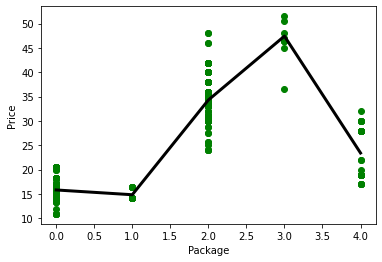

In [98]:
df = pd.DataFrame({'x':x_test[:,0], 'y': y_pred[:,0]})
df.sort_values(by='x',inplace=True)
points = pd.DataFrame(df).to_numpy()
plt.plot(points[:, 0], points[:, 1],color="black", linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.scatter(x,y, color="green")
plt.show()

Now we can observe that the line fits our data much better than linear regression.

In [99]:
# Calculate accuracy
accuracy_score = pipeline.score(x_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.8537946517073784


This is a much much better accuracy! Now we will try to predict a price using our model.

In [102]:
pipeline.predict( np.array([ [3.5] ]) )

array([[42.13908337]])

In [ ]:
# Splitting, training and predicting

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
# model = LinearRegression()
# model.fit(x_train, y_train)
# pred = model.predict(x_test)


In [ ]:
# plt.scatter(x_test,y_test, color='red')
# plt.plot(x_test,pred,color='black', linewidth=3)
# plt.xlabel('Package')
# plt.ylabel('Price')
# plt.show()

In [ ]:
# # Metrics
# #---------

# accuracy = model.score(x_train,y_train)
# print('Accuracy: ', accuracy)

# # R2 score or regression score
# print('R2 Score', r2_score(y_test, pred))

# # Mean squared error
# print('Mean Square Error', mean_squared_error(y_test,pred))

# # Mean absolute error
# print('Mean Absolute Error', mean_absolute_error(y_test,pred))


Our model has an accuracy of '0.3315342327998987' which is not that good, we got this accuracy because we selected features that had not that good of a correlation.